## In this small assignment, we are going to use ARIMA model to predict sales of Champagne Bottles of Perrin Freres from 1964-1972. We are going to walkthrough some intricacies of autocorrelations and seasonal cyclicality. Finally we choose the appropriate model for ARIMA, always keeping parsimony in mind

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
## Monthly Sales Data
df=pd.read_csv('C:/Users/adib-/Downloads/perrin-freres-monthly-champagne-.csv')
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [5]:
#Check For missing values otherwise model runs into an error
df=df.dropna()

In [6]:
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [7]:
## Important step-Make sure to convert your month/year/whatever time you have to actual time converted data otherwise algorithms will not pick up if it's time or string
df['Month']=pd.to_datetime(df['Month'])
df['Month']

C:\Users\adib-\AppData\Local\Temp\ipykernel_28552\480560605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=pd.to_datetime(df['Month'])


0     1964-01-01
1     1964-02-01
2     1964-03-01
3     1964-04-01
4     1964-05-01
         ...    
100   1972-05-01
101   1972-06-01
102   1972-07-01
103   1972-08-01
104   1972-09-01
Name: Month, Length: 105, dtype: datetime64[ns]

In [8]:
df.set_index('Month',inplace=True)

In [9]:
df

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [12]:
## Let's rename a bit
df=df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72':'Sales'})
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


<AxesSubplot: xlabel='Month'>

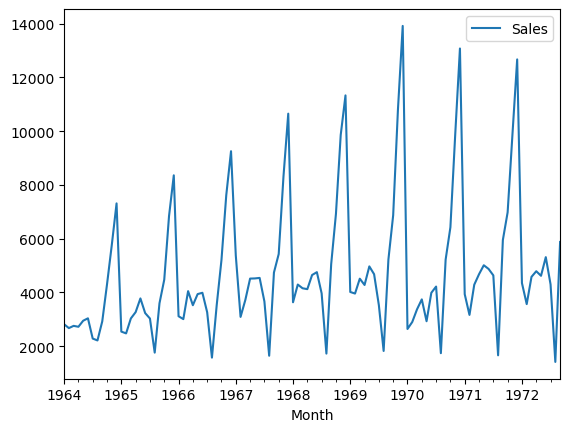

In [13]:
#Plot The Sales Figure
df.plot()

## Already we see here that autocorrelation exist to some extent because the moments are not reverting back to the same level as before. It's at a higher level and there is a trend, not mention the seasonility every 4 months or so

In [14]:
## Recall undergrad Econometrics, null hypothesis: non-stationarity and alternative: stationarity. First use the first oder of difference and if the p-value is lower than 0.95, Take that one otherwise use the second difference
from statsmodels.tsa.stattools import adfuller

## ADF Results are usually written as test stat value, p-value, number of lags used, n, critical values coresponding confidence level, AIC

In [15]:
adfuller(df['Sales']) #First order it is then!

(-1.833593056327623,
 0.363915771660245,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [18]:
## First Difference Sales
df['FD_S']=df['Sales'].diff()
df['FD_S']

Month
1964-01-01       NaN
1964-02-01    -143.0
1964-03-01      83.0
1964-04-01     -34.0
1964-05-01     225.0
               ...  
1972-05-01    -170.0
1972-06-01     694.0
1972-07-01   -1014.0
1972-08-01   -2885.0
1972-09-01    4464.0
Name: FD_S, Length: 105, dtype: float64

## But remember we need Seasonal Difference we have seasonality

In [16]:
df['SFD_S']=df['Sales'].diff(12)
df['SFD_S']

Month
1964-01-01      NaN
1964-02-01      NaN
1964-03-01      NaN
1964-04-01      NaN
1964-05-01      NaN
              ...  
1972-05-01   -392.0
1972-06-01    438.0
1972-07-01   -335.0
1972-08-01   -246.0
1972-09-01    -74.0
Name: SFD_S, Length: 105, dtype: float64

In [19]:
# Now let's see both plots 

<AxesSubplot: xlabel='Month'>

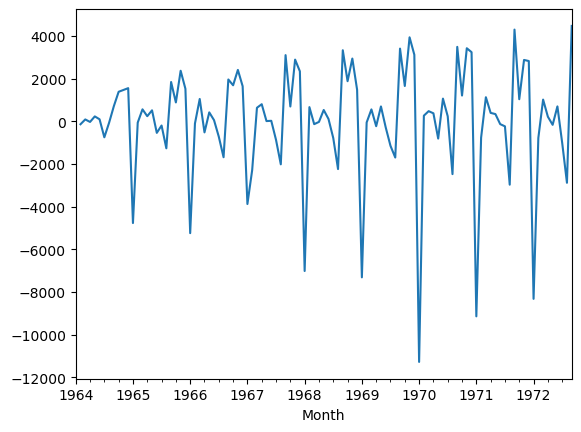

In [19]:
df['FD_S'].plot()

<AxesSubplot: xlabel='Month'>

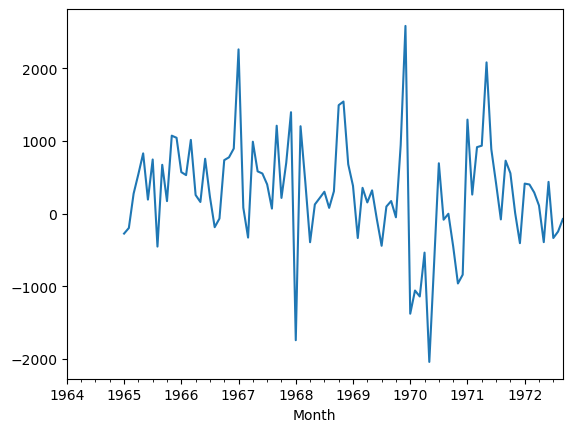

In [20]:
df['SFD_S'].plot()

In [22]:
import statsmodels.api as sm

## Now are we going to plot Autocorrelation and PACF Plots because we need to determine the lags for our ARIMA model

c:\Users\adib-\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


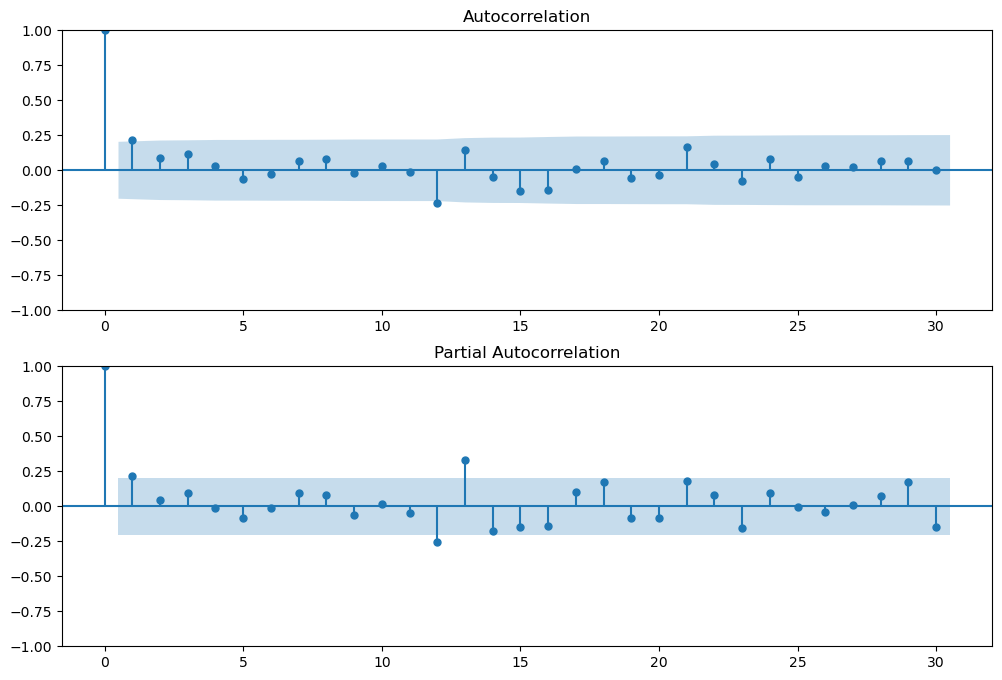

In [23]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_acf(df['SFD_S'].dropna(),lags=30,ax=ax1)
fig=sm.graphics.tsa.plot_pacf(df['SFD_S'].dropna(),lags=30,ax=ax2)


In [24]:
###Either choose ARIMA(1,1,0) or (0,1,1) -Look at PACF for order of p and ACF for order of q. And we already did the d(Lol), so it will be (p,1,q).
from statsmodels.tsa.arima.model import ARIMA

In [25]:
## There are many youtubers or books that use for loops and automatic ARIMA selection to get the order of p d q. But in this being as educated we are from actual universities and professors' guidelines, economic theory
## We should always be simple and make our model easy to understand. In Machine learning, there is trade-off between model complexity and Fitting. Obviously, we want the best fit
## However, adding parameters will always give you higher R square but we need to have balance of model complexity and fitting so that we don't overfit

In [26]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

c:\Users\adib-\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\adib-\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\adib-\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Sat, 30 Sep 2023   AIC                           1911.627
Time:                        20:23:05   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: xlabel='Month'>

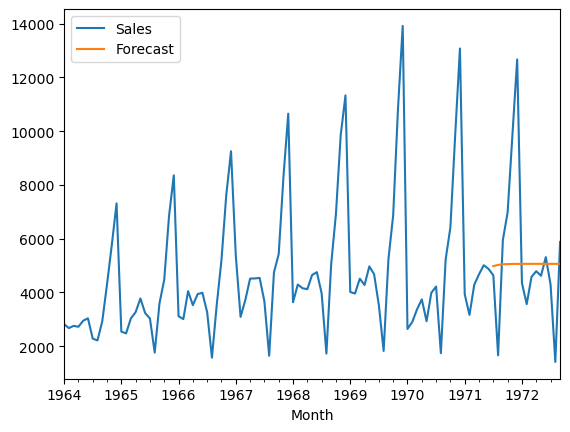

In [28]:
df['Forecast']=model_fit.predict(start=90,end=104,dynamic=True)
df[['Sales','Forecast']].plot()

In [29]:
## Clearly the above is False and this is why we don't use just normal differencing

In [30]:
## Seaonal ARIMA
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

c:\Users\adib-\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\adib-\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot: xlabel='Month'>

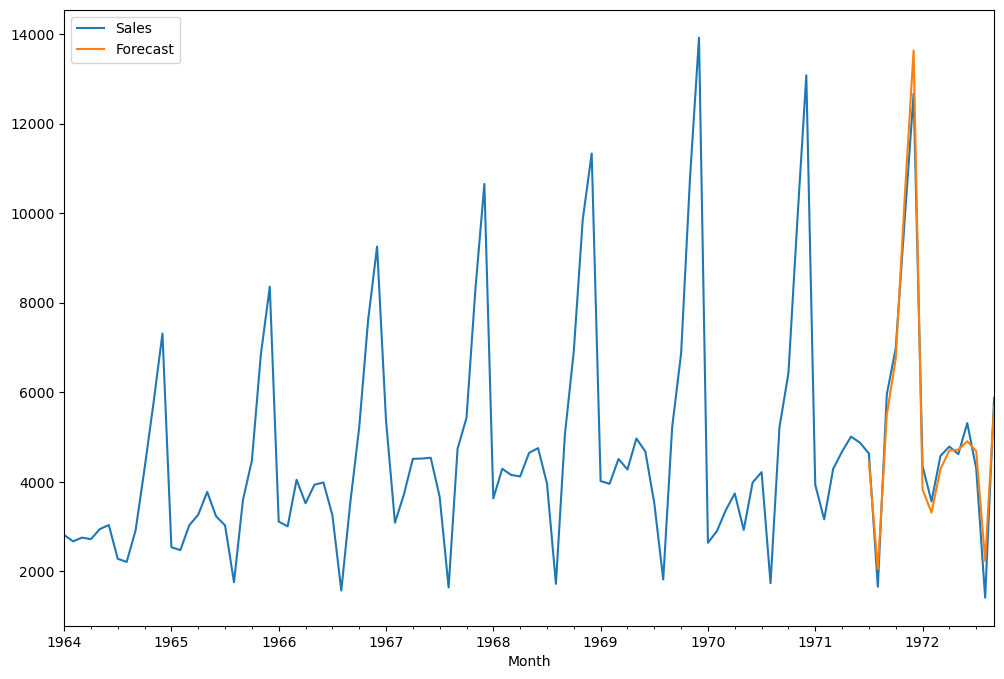

In [31]:
df['Forecast']=results.predict(start=90,end=104,dynamic=True)
df[['Sales','Forecast']].plot(figsize=(12,8))

In [ ]:
## Now we want to look at beyond these dates. Let's create Fake Dates and see what this orange line looks like

In [33]:
## Adding 24 months towards our end of date index or our dataframe index
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [34]:
##Creating Another column
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [35]:
future_df=pd.concat([df,future_dates_df])

In [36]:
future_df

,Sales,SFD_S,FD_S,Forecast
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,NaN,-143.0,NaN
1964-03-01,2755.0,NaN,83.0,NaN
1964-04-01,2721.0,NaN,-34.0,NaN
1964-05-01,2946.0,NaN,225.0,NaN
...,...,...,...,...
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN


<AxesSubplot: >

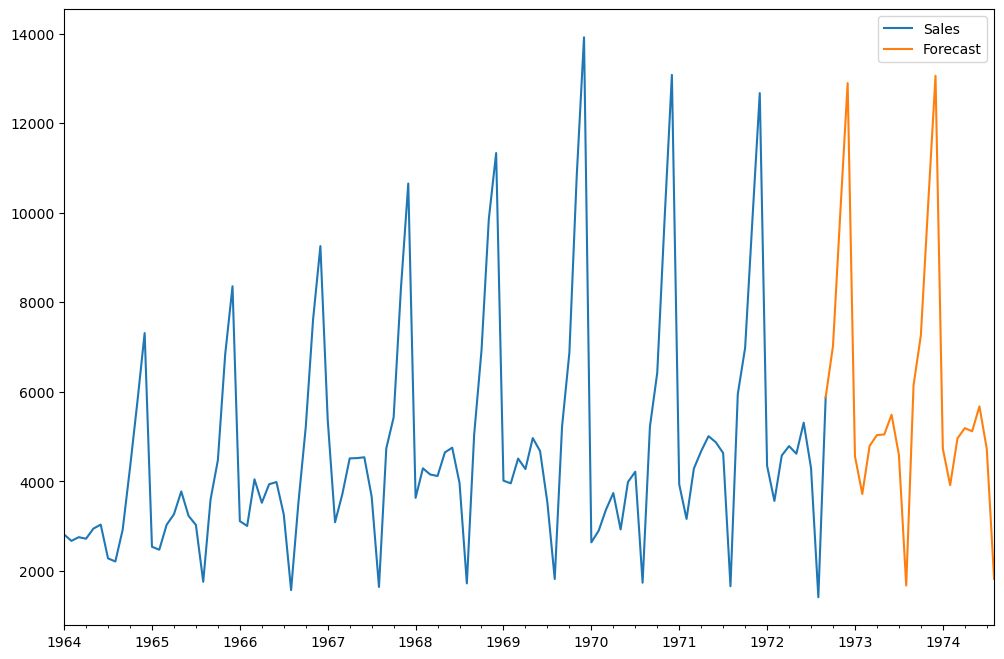

In [37]:
## Now start will be our previous end date and our end date will comprise the additional months we created
future_df['Forecast']=results.predict(start=104,end=130,dynamic=True)
future_df[['Sales','Forecast']].plot(figsize=(12,8))

In [38]:
future_df

,Sales,SFD_S,FD_S,Forecast
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,NaN,-143.0,NaN
1964-03-01,2755.0,NaN,83.0,NaN
1964-04-01,2721.0,NaN,-34.0,NaN
1964-05-01,2946.0,NaN,225.0,NaN
...,...,...,...,...
1974-04-01,NaN,NaN,NaN,5189.452697
1974-05-01,NaN,NaN,NaN,5119.495093
1974-06-01,NaN,NaN,NaN,5675.242066
1974-07-01,NaN,NaN,NaN,4726.202452
